In [29]:
# Imports

# Numpy,Pandas
import numpy as np
import pandas as pd

# matplotlib,seaborn,missingno
import matplotlib.pyplot as plt
plt.style.use('ggplot') 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')  

# set float display format
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [30]:
# display the original data
data = pd.read_csv('LoanStats3a.csv',skiprows = 1) 
data.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,nan,5000.00000,5000.00000,4975.00000,36 months,10.65%,162.87000,B,B2,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
1,NaN,nan,2500.00000,2500.00000,2500.00000,60 months,15.27%,59.83000,C,C4,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
2,NaN,nan,2400.00000,2400.00000,2400.00000,36 months,15.96%,84.33000,C,C5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
3,NaN,nan,10000.00000,10000.00000,10000.00000,36 months,13.49%,339.31000,C,C1,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan
4,NaN,nan,3000.00000,3000.00000,3000.00000,60 months,12.69%,67.79000,B,B5,...,nan,nan,Cash,N,NaN,NaN,NaN,nan,nan,nan


In [31]:
# deal with the "null" series

#check the columns with null values greater than 20%
check_null = data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) 
check_null[check_null > 0.2]

total_cu_tl                           1.00000
pct_tl_nvr_dlq                        1.00000
mths_since_recent_bc                  1.00000
mths_since_recent_bc_dlq              1.00000
mths_since_recent_inq                 1.00000
mths_since_recent_revol_delinq        1.00000
num_accts_ever_120_pd                 1.00000
num_actv_bc_tl                        1.00000
num_actv_rev_tl                       1.00000
num_bc_sats                           1.00000
num_bc_tl                             1.00000
num_il_tl                             1.00000
num_op_rev_tl                         1.00000
num_rev_accts                         1.00000
num_rev_tl_bal_gt_0                   1.00000
num_sats                              1.00000
num_tl_120dpd_2m                      1.00000
num_tl_30dpd                          1.00000
num_tl_90g_dpd_24m                    1.00000
mort_acc                              1.00000
mo_sin_rcnt_tl                        1.00000
mo_sin_rcnt_rev_tl_op             

In [32]:
#mths_since_last_delinq                0.63306
#desc                                  0.31257

#'mths_since_last_delinq' means 'The number of months since the borrower's last delinquency.'
#'desc' means 'Loan description provided by the borrower.'

#drop all these null columns including 'mths_since_last_delinq' and 'desc'(meaningless columns)

thresh_count = len(data)*0.8
data = data.dropna(thresh=thresh_count, axis=1 ) 

#check again
data.isnull().sum(axis=0).sort_values(ascending=False)/float(len(data)) 

emp_title                    0.06180
pub_rec_bankruptcies         0.03216
emp_length                   0.02621
chargeoff_within_12_mths     0.00348
collections_12_mths_ex_med   0.00348
tax_liens                    0.00254
revol_util                   0.00219
last_pymnt_d                 0.00202
delinq_2yrs                  0.00075
delinq_amnt                  0.00075
acc_now_delinq               0.00075
earliest_cr_line             0.00075
inq_last_6mths               0.00075
open_acc                     0.00075
pub_rec                      0.00075
total_acc                    0.00075
title                        0.00038
annual_inc                   0.00016
last_credit_pull_d           0.00016
zip_code                     0.00007
pymnt_plan                   0.00007
purpose                      0.00007
funded_amnt                  0.00007
funded_amnt_inv              0.00007
term                         0.00007
int_rate                     0.00007
installment                  0.00007
s

In [33]:

null_counts = data.isnull().sum() 
null_counts


loan_amnt                        3
funded_amnt                      3
funded_amnt_inv                  3
term                             3
int_rate                         3
installment                      3
grade                            3
sub_grade                        3
emp_title                     2629
emp_length                    1115
home_ownership                   3
annual_inc                       7
verification_status              3
issue_d                          3
loan_status                      3
pymnt_plan                       3
purpose                          3
title                           16
zip_code                         3
addr_state                       3
dti                              3
delinq_2yrs                     32
earliest_cr_line                32
inq_last_6mths                  32
open_acc                        32
pub_rec                         32
revol_bal                        3
revol_util                      93
total_acc           

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 53 columns):
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39909 non-null object
emp_length                    41423 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
pymnt_plan                    42535 non-null object
purpose                       42535 non-null object
ti

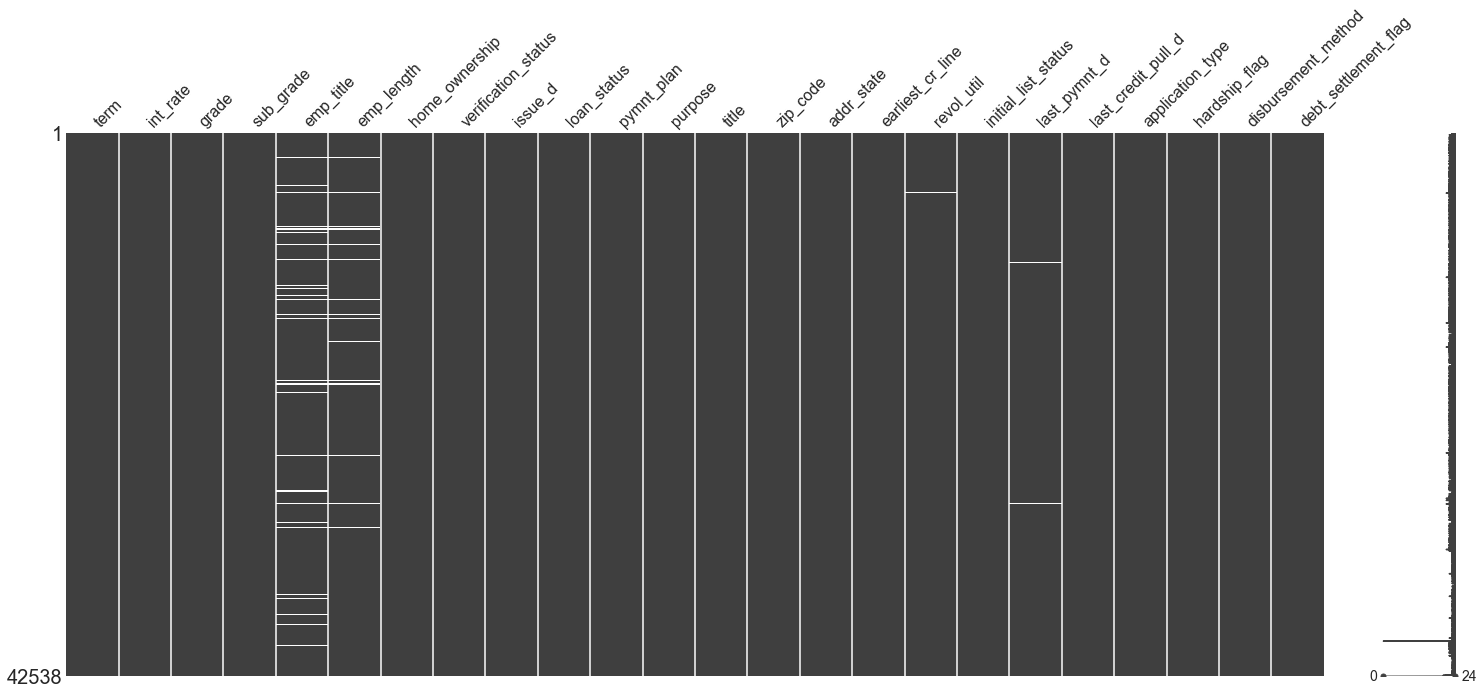

In [35]:
objectColumns = data.select_dtypes(include=["object"]).columns 
# show the object variable's missing 
msno.matrix(data[objectColumns])

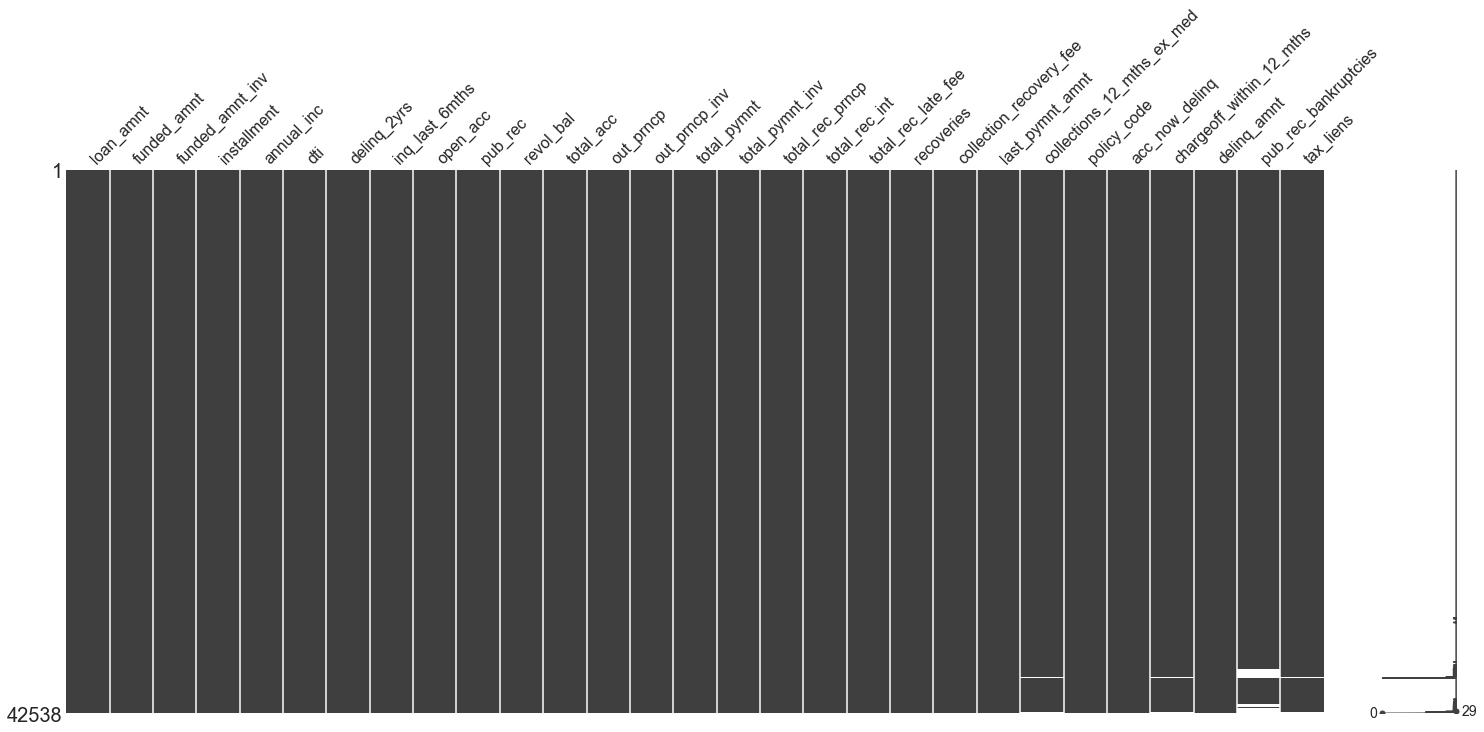

In [36]:
numColumns = data.select_dtypes(include=[np.number]).columns
msno.matrix(data[numColumns]) 

In [39]:
data.dropna(axis=0, how='any', inplace=True) #drop all rows that have any NaN values (42538 rows are enough)


null_counts = data.isnull().sum() 
null_counts

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [40]:
# save the processed data(no null value)
data.to_csv('loans_2018q2_ml.csv', index = False)

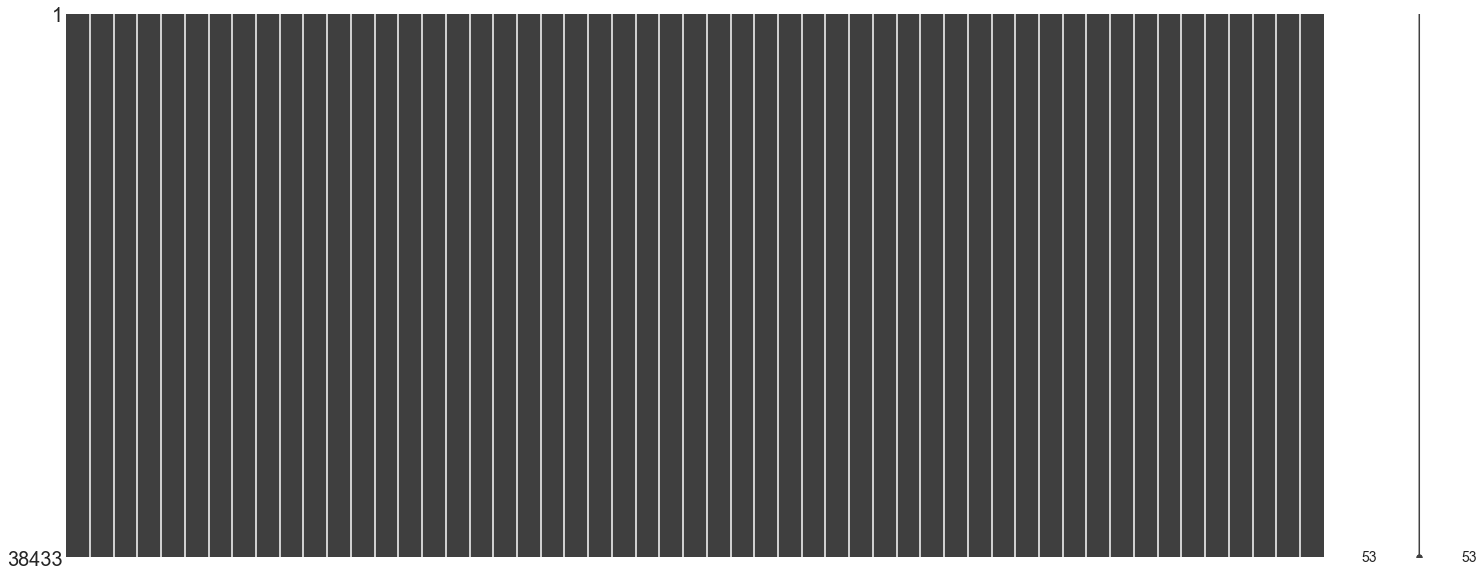

In [57]:
loans = pd.read_csv('loans_2018q2_ml.csv') 

msno.matrix(loans)

In [58]:
null_counts = loans.isnull().sum() 
null_counts

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

In [60]:
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,disbursement_method,debt_settlement_flag
0,2500.00000,2500.00000,2500.00000,60 months,15.27%,59.83000,C,C4,Ryder,< 1 year,...,1.00000,Individual,0.00000,0.00000,0.00000,0.00000,0.00000,N,Cash,N
1,10000.00000,10000.00000,10000.00000,36 months,13.49%,339.31000,C,C1,AIR RESOURCES BOARD,10+ years,...,1.00000,Individual,0.00000,0.00000,0.00000,0.00000,0.00000,N,Cash,N
2,3000.00000,3000.00000,3000.00000,60 months,12.69%,67.79000,B,B5,University Medical Group,1 year,...,1.00000,Individual,0.00000,0.00000,0.00000,0.00000,0.00000,N,Cash,N
3,5000.00000,5000.00000,5000.00000,36 months,7.90%,156.46000,A,A4,Veolia Transportaton,3 years,...,1.00000,Individual,0.00000,0.00000,0.00000,0.00000,0.00000,N,Cash,N
4,7000.00000,7000.00000,7000.00000,60 months,15.96%,170.08000,C,C5,Southern Star Photography,8 years,...,1.00000,Individual,0.00000,0.00000,0.00000,0.00000,0.00000,N,Cash,N


In [61]:
# deal with the columns that have 1 value only 

loans = loans.loc[:,loans.apply(pd.Series.nunique) != 1]
loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,debt_settlement_flag
0,2500.00000,2500.00000,2500.00000,60 months,15.27%,59.83000,C,C4,Ryder,< 1 year,...,456.46000,435.17000,0.00000,122.90000,1.11000,Apr-2013,119.66000,Oct-2016,0.00000,N
1,10000.00000,10000.00000,10000.00000,36 months,13.49%,339.31000,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00000,2214.92000,16.97000,0.00000,0.00000,Jan-2015,357.48000,Apr-2016,0.00000,N
2,3000.00000,3000.00000,3000.00000,60 months,12.69%,67.79000,B,B5,University Medical Group,1 year,...,3000.00000,1066.91000,0.00000,0.00000,0.00000,Jan-2017,67.30000,Apr-2018,0.00000,N
3,5000.00000,5000.00000,5000.00000,36 months,7.90%,156.46000,A,A4,Veolia Transportaton,3 years,...,5000.00000,632.21000,0.00000,0.00000,0.00000,Jan-2015,161.03000,Feb-2017,0.00000,N
4,7000.00000,7000.00000,7000.00000,60 months,15.96%,170.08000,C,C5,Southern Star Photography,8 years,...,7000.00000,3137.84000,0.00000,0.00000,0.00000,May-2016,1313.76000,Sep-2016,0.00000,N


In [62]:
loans.dtypes.value_counts() 

float64    21
object     19
dtype: int64

In [63]:
loans.to_csv('loans_2018q2_1.csv',index = False)

In [64]:
loans = pd.read_csv('loans_2018q2_1.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38433 entries, 0 to 38432
Data columns (total 40 columns):
loan_amnt                  38433 non-null float64
funded_amnt                38433 non-null float64
funded_amnt_inv            38433 non-null float64
term                       38433 non-null object
int_rate                   38433 non-null object
installment                38433 non-null float64
grade                      38433 non-null object
sub_grade                  38433 non-null object
emp_title                  38433 non-null object
emp_length                 38433 non-null object
home_ownership             38433 non-null object
annual_inc                 38433 non-null float64
verification_status        38433 non-null object
issue_d                    38433 non-null object
loan_status                38433 non-null object
purpose                    38433 non-null object
title                      38433 non-null object
zip_code                   38433 non-null object
addr

In [65]:
# drop the meaningless columns after checking the data dictionary by LendingClub

#funded_amnt	The total amount committed to that loan at that point in time.
#funded_amnt_inv	The total amount committed by investors for that loan at that point in time.
loans = loans.drop([ "funded_amnt", "funded_amnt_inv"], axis=1)

#emp_title	The job title supplied by the Borrower when applying for the loan.*
#issue_d	The month which the loan was funded
loans = loans.drop(["emp_title","issue_d"],axis=1)

#total_pymnt	Payments received to date for total amount funded
#total_pymnt_inv	Payments received to date for portion of total amount funded by investors
#total_rec_prncp	Principal received to date
#zip_code	The first 3 numbers of the zip code provided by the borrower in the loan application.
loans = loans.drop(["zip_code", "total_pymnt", "total_pymnt_inv", "total_rec_prncp"], axis=1)

#total_rec_int	Interest received to date
#total_rec_late_fee	Late fees received to date
#recoveries	post charge off gross recovery
#collection_recovery_fee	post charge off collection fee
#last_pymnt_amnt	Last total payment amount received
#last_pymnt_d	Last month payment was received
loans = loans.drop(["total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"], axis=1)

#last_credit_pull_d	The most recent month LC pulled credit for this loan
#addr_state	The state provided by the borrower in the loan application
loans = loans.drop(["last_credit_pull_d", "addr_state"], axis=1)

loans.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38433 entries, 0 to 38432
Data columns (total 24 columns):
loan_amnt               38433 non-null float64
term                    38433 non-null object
int_rate                38433 non-null object
installment             38433 non-null float64
grade                   38433 non-null object
sub_grade               38433 non-null object
emp_length              38433 non-null object
home_ownership          38433 non-null object
annual_inc              38433 non-null float64
verification_status     38433 non-null object
loan_status             38433 non-null object
purpose                 38433 non-null object
title                   38433 non-null object
dti                     38433 non-null float64
delinq_2yrs             38433 non-null float64
earliest_cr_line        38433 non-null object
inq_last_6mths          38433 non-null float64
open_acc                38433 non-null float64
pub_rec                 38433 non-null float64
revol_bal

In [66]:
loans.to_csv('loans_2018q2_2.csv',index = False)

In [67]:
loans = pd.read_csv('loans_2018q2_2.csv')
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38433 entries, 0 to 38432
Data columns (total 24 columns):
loan_amnt               38433 non-null float64
term                    38433 non-null object
int_rate                38433 non-null object
installment             38433 non-null float64
grade                   38433 non-null object
sub_grade               38433 non-null object
emp_length              38433 non-null object
home_ownership          38433 non-null object
annual_inc              38433 non-null float64
verification_status     38433 non-null object
loan_status             38433 non-null object
purpose                 38433 non-null object
title                   38433 non-null object
dti                     38433 non-null float64
delinq_2yrs             38433 non-null float64
earliest_cr_line        38433 non-null object
inq_last_6mths          38433 non-null float64
open_acc                38433 non-null float64
pub_rec                 38433 non-null float64
revol_bal

In [68]:
# drop "sub_grade" and keep "grade"
# drop "title" and keep "purpose"
# earliest_cr_line	The month the borrower's earliest reported credit line was opened
# drop "earliest_cr_line" 

loans = loans.drop(["sub_grade", "title","earliest_cr_line"], axis=1)
loans.select_dtypes(include = ['object']).head()


,term,int_rate,grade,emp_length,home_ownership,verification_status,loan_status,purpose,revol_util,debt_settlement_flag
0,60 months,15.27%,C,< 1 year,RENT,Source Verified,Charged Off,car,9.4%,N
1,36 months,13.49%,C,10+ years,RENT,Source Verified,Fully Paid,other,21%,N
2,60 months,12.69%,B,1 year,RENT,Source Verified,Fully Paid,other,53.9%,N
3,36 months,7.90%,A,3 years,RENT,Source Verified,Fully Paid,wedding,28.3%,N
4,60 months,15.96%,C,8 years,RENT,Not Verified,Fully Paid,debt_consolidation,85.6%,N


In [69]:
# deal with "int_rate" and "revol_util" 
# convert data type from object to float

loans["int_rate"] = loans["int_rate"].str.rstrip("%").astype("float")

loans["revol_util"] = loans["revol_util"].str.rstrip("%").astype("float")

loans.select_dtypes(include = ['object']).head()

,term,grade,emp_length,home_ownership,verification_status,loan_status,purpose,debt_settlement_flag
0,60 months,C,< 1 year,RENT,Source Verified,Charged Off,car,N
1,36 months,C,10+ years,RENT,Source Verified,Fully Paid,other,N
2,60 months,B,1 year,RENT,Source Verified,Fully Paid,other,N
3,36 months,A,3 years,RENT,Source Verified,Fully Paid,wedding,N
4,60 months,C,8 years,RENT,Not Verified,Fully Paid,debt_consolidation,N


In [70]:
objectColumns = loans.select_dtypes(include=["object"]).columns
var = loans[objectColumns].columns
for v in var:
    print('\nFrequency count for variable {0}'.format(v))
    print(loans[v].value_counts())
loans[objectColumns].shape


Frequency count for variable term
 36 months    28019
 60 months    10414
Name: term, dtype: int64

Frequency count for variable grade
B    11293
A     9238
C     7928
D     5414
E     3016
F     1128
G      416
Name: grade, dtype: int64

Frequency count for variable emp_length
10+ years    8802
2 years      4444
< 1 year     4306
3 years      4119
4 years      3460
5 years      3268
1 year       3250
6 years      2232
7 years      1779
8 years      1502
9 years      1271
Name: emp_length, dtype: int64

Frequency count for variable home_ownership
RENT        18290
MORTGAGE    17309
OWN          2704
OTHER         130
Name: home_ownership, dtype: int64

Frequency count for variable verification_status
Not Verified       16131
Verified           12547
Source Verified     9755
Name: verification_status, dtype: int64

Frequency count for variable loan_status
Fully Paid                                             31509
Charged Off                                             4983
Does not m

(38433, 8)

In [71]:
# drop the meaningless samples from "loan_status", only keep "Fully Paid" and "Charged Off"

loans = loans[(loans['loan_status'] == "Fully Paid") | (loans['loan_status'] == "Charged Off")]

# convert "term" from object to int

loans['term'] = loans['term'].apply(lambda x: int(x[:-7]))

# deal with Ordinal Variable "grade" and "emp_length"

mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}
loans = loans.replace(mapping_dict)

loans.select_dtypes(include = ['object']).head()


,home_ownership,verification_status,loan_status,purpose,debt_settlement_flag
0,RENT,Source Verified,Charged Off,car,N
1,RENT,Source Verified,Fully Paid,other,N
2,RENT,Source Verified,Fully Paid,other,N
3,RENT,Source Verified,Fully Paid,wedding,N
4,RENT,Not Verified,Fully Paid,debt_consolidation,N


In [72]:
# deal with categorical variables
# one-hot encoding
cat_columns = ["home_ownership", "verification_status", "purpose", "debt_settlement_flag"]
dummy_df = pd.get_dummies(loans[cat_columns])
loans = pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)
loans.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500.00000,60,15.27000,59.83000,3,0,30000.00000,Charged Off,1.00000,0.00000,...,0,0,0,0,0,0,0,0,1,0
1,10000.00000,36,13.49000,339.31000,3,10,49200.00000,Fully Paid,20.00000,0.00000,...,0,0,0,1,0,0,0,0,1,0
2,3000.00000,60,12.69000,67.79000,2,1,80000.00000,Fully Paid,17.94000,0.00000,...,0,0,0,1,0,0,0,0,1,0
3,5000.00000,36,7.90000,156.46000,1,3,36000.00000,Fully Paid,11.20000,0.00000,...,0,0,0,0,0,0,0,1,1,0
4,7000.00000,60,15.96000,170.08000,3,8,47004.00000,Fully Paid,23.51000,0.00000,...,0,0,0,0,0,0,0,0,1,0


In [73]:
# "loan_status" is the label
status_replace = {
    "loan_status" : { "Fully Paid": 1,
                      "Charged Off": 0, }
}

loans = loans.replace(status_replace)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36492 entries, 0 to 36491
Data columns (total 40 columns):
loan_amnt                              36492 non-null float64
term                                   36492 non-null int64
int_rate                               36492 non-null float64
installment                            36492 non-null float64
grade                                  36492 non-null int64
emp_length                             36492 non-null int64
annual_inc                             36492 non-null float64
loan_status                            36492 non-null int64
dti                                    36492 non-null float64
delinq_2yrs                            36492 non-null float64
inq_last_6mths                         36492 non-null float64
open_acc                               36492 non-null float64
pub_rec                                36492 non-null float64
revol_bal                              36492 non-null float64
revol_util                     

In [74]:
loans[0:20]

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,debt_settlement_flag_N,debt_settlement_flag_Y
0,2500.00000,60,15.27000,59.83000,3,0,30000.00000,0,1.00000,0.00000,...,0,0,0,0,0,0,0,0,1,0
1,10000.00000,36,13.49000,339.31000,3,10,49200.00000,1,20.00000,0.00000,...,0,0,0,1,0,0,0,0,1,0
2,3000.00000,60,12.69000,67.79000,2,1,80000.00000,1,17.94000,0.00000,...,0,0,0,1,0,0,0,0,1,0
3,5000.00000,36,7.90000,156.46000,1,3,36000.00000,1,11.20000,0.00000,...,0,0,0,0,0,0,0,1,1,0
4,7000.00000,60,15.96000,170.08000,3,8,47004.00000,1,23.51000,0.00000,...,0,0,0,0,0,0,0,0,1,0
5,3000.00000,36,18.64000,109.43000,5,9,48000.00000,1,5.35000,0.00000,...,0,0,0,0,0,0,0,0,1,0
6,5375.00000,60,12.69000,121.45000,2,0,15000.00000,0,18.08000,0.00000,...,0,0,0,1,0,0,0,0,1,0
7,6500.00000,60,14.65000,153.45000,3,5,72000.00000,1,16.12000,0.00000,...,0,0,0,0,0,0,0,0,1,0
8,12000.00000,36,12.69000,402.54000,2,10,75000.00000,1,10.78000,0.00000,...,0,0,0,0,0,0,0,0,1,0
9,9000.00000,36,13.49000,305.38000,3,0,30000.00000,0,10.08000,0.00000,...,0,0,0,0,0,0,0,0,1,0


In [75]:
loans.dtypes.value_counts() 

uint8      23
float64    13
int64       4
dtype: int64

In [76]:
loans.shape

(36492, 40)

In [77]:
loans.to_csv('loans_preprocessed.csv', index = False) # 将初步预处理后的数据转化为csv
